<a href="https://colab.research.google.com/github/MoudiAlhazzaa/Machine_learning_Project/blob/main/T5_Project_Module_4_Machine_Learning_Nawaf_Moudi_Zahrah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative Analysis of Machine Learning Models on the Iris Dataset Analysis**
### BY: Nawaf Aljalaud / ... / ...
#### "SDAIA Bootcamp T5": Project-Module 4 Machine Learning


##Tasks and Mark Distribution:

##1. Data Preprocessing


 * Load the Iris dataset.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=columns)

* Perform data exploration and visualization.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration
print(iris.head())
print(iris.tail())
print(iris.sample(5))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
     sepal_length  sepal_width  petal_length  petal_width          species
130           7.4          2.8           6.1          1.9   Iris-vi

In [ ]:
num_rows, num_cols = iris.shape # num of cols and rows
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

In [ ]:
iris.columns

In [ ]:
iris.dtypes

* visualization using Swarmplots to show the distribution of measurements by species.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


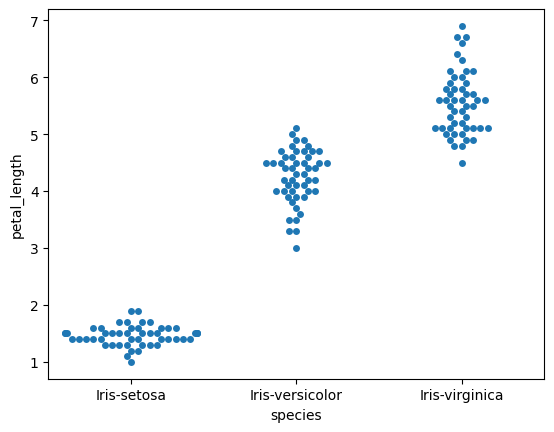

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


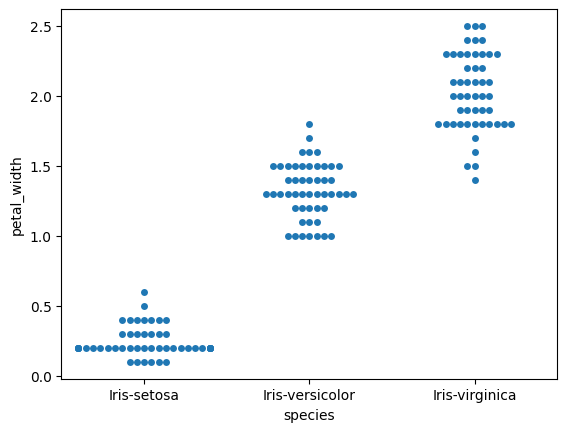

In [ ]:
#species vs petal_length
sns.swarmplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

#species vs petal_width
sns.swarmplot(x = 'species', y = 'petal_width', data = iris)
plt.show()

* Check for missing values and handle them if any.

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
dup_rows = iris.duplicated() # check for duplicate each row
dup_rows

In [ ]:
iris.describe(include='object')

* Split the dataset into features and the target variable

In [ ]:
X = iris.drop('species', axis=1)
y = iris['species']